In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns" , None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import random
import os
from tqdm import notebook
import gc
from string import punctuation
import chardet
import re
from datetime import datetime

from sklearn.pipeline import Pipeline , make_pipeline

np.random.seed(0)
random.seed(0)
pd.set_option("display.max_columns" , None)

from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer , PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

#Reading CSV

In [6]:
data = pd.read_csv("C:/Users/nikhi/Downloads/mbti_1.csv",encoding='latin1') #this is my drive link so change it
#final_data = pd.read_csv("/content/drive/My Drive/LinkedIn/Final_data.csv",encoding='latin1')
final_data = pd.read_csv("C:/Users/nikhi/Downloads/nine.csv",encoding='latin1')

In [7]:
final_data.isnull().sum()

_id                0
First Name         0
Last Name          0
locality           0
skills             0
                ... 
Unnamed: 171    5599
Unnamed: 172    5599
Unnamed: 173    5599
Unnamed: 174    5599
Unnamed: 175    5599
Length: 176, dtype: int64

#Checking and dropping Null values

In [8]:
final_data.dropna(inplace=True)
final_data.isnull().sum()

_id             0
First Name      0
Last Name       0
locality        0
skills          0
               ..
Unnamed: 171    0
Unnamed: 172    0
Unnamed: 173    0
Unnamed: 174    0
Unnamed: 175    0
Length: 176, dtype: int64

In [11]:
final_data.shape

(1, 176)

In [9]:
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [10]:
final_data.head()

,_id,First Name,Last Name,locality,skills,industry,summary,url,also_view,group,overview_html,interval,specilities,events,interests,homepage,honors,Education_Major,Education_Degree,Education_Description,Education_Start,Education_End,Experience_Title,Experience_Organisation,Experience_Start,Experience_End,Experience_Description,Experience_Title_single,Experience_Organisation_single,Experience_Start_single,Experience_End_single,Experience_Description_single,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175
5472,President','title1': 'Sales Sales Sales Sales Sales Sale...,'start': 23939,'title2': 'Vice President Vice President Vice...,'end': 23939},{'from': 'Vice President Vice President Vice ...,'to': 'Managing Director Managing Director Ma...,'title1': 'Vice President Vice President Vice...,'start': 23939,'title2': 'Managing Director Managing Directo...,'end': 23939},{'from': 'Managing Director Managing Director...,'to': 'Information Technology Services Inform...,'title1': 'Managing Director Managing Directo...,'start': 23939,'title2': 'Information Technology Services In...,'end': 23939},{'from': 'Information Technology Services Inf...,'to': 'IT IT IT IT IT IT IT IT IT IT IT IT IT...,'title1': 'Information Technology Services In...,'start': 23939,'title2': 'IT IT IT IT IT IT IT IT IT IT IT I...,'end': 23939},{'from': 'IT IT IT IT IT IT IT IT IT IT IT IT...,'to': 'Recruiter Recruiter Recruiter Recruite...,'title1': 'IT IT IT IT IT IT IT IT IT IT IT I...,'start': 23939,'title2': 'Recruiter Recruiter Recruiter Recr...,'end': 23939},{'from': 'Recruiter Recruiter Recruiter Recru...,'to': 'National Account Manager National Acco...,'title1': 'Recruiter Recruiter Recruiter Recr...,'start': 23939,'title2': 'National Account Manager National ...,'end': 23939},{'from': 'National Account Manager National A...,'to': 'Business Development Manager Business ...,'title1': 'National Account Manager National ...,'start': 23939,'title2': 'Business Development Manager Busin...,'end': 23939},{'from': 'Business Development Manager Busine...,'to': 'Technology Technology Technology Techn...,'title1': 'Business Development Manager Busin...,'start': 23939,'title2': 'Technology Technology Technology T...,'end': 23939},{'from': 'Technolog

## **Removing rows with empty text**

In [8]:
indexNames = final_data[final_data['summary'] == 'empty' ].index #do this 
indexNames

Int64Index([], dtype='int64')

In [9]:
final_data.drop(indexNames , inplace=True) #do this

## **Removing rows with blank value**

In [10]:
indexNames = final_data[final_data['summary'] == ' ' ].index #do this 
indexNames

Int64Index([], dtype='int64')

In [11]:
final_data.drop(indexNames , inplace=True) #do this

In [12]:
df_temp = final_data
df_sum = pd.DataFrame(df_temp['summary'],columns=['summary']) #do this

In [13]:
df_sum.head()

,summary
0,Executive with extensive experience in the ind...
1,Logistic and Supply Chain leader experienced i...
2,Online/digital marketing professional with exp...
3,Trabalhei na área da Consultoria da Comunicaçã...
4,Soy el responsable de acuerdos comerciales y p...


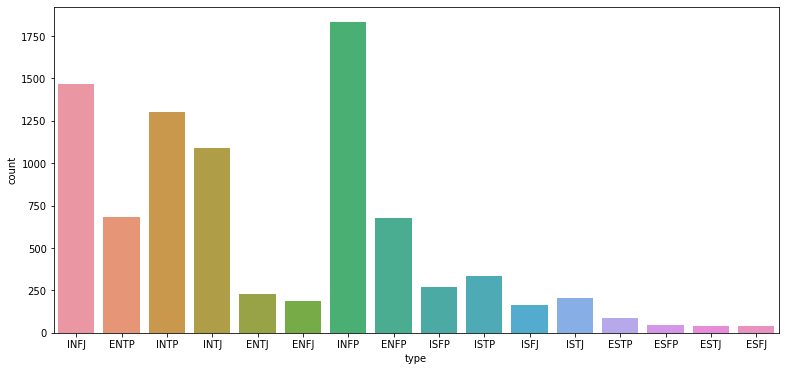

In [14]:
plt.figure(figsize=(13,6))
ax = sns.countplot(x="type", data=data)

In [15]:
p1 = []
p2 = []
p3 = []
p4 = []

df_personality = pd.DataFrame()
for val in data['type']:
  p1.append(val.split()[0][0])
  p2.append(val.split()[0][1])
  p3.append(val.split()[0][2])
  p4.append(val.split()[0][3])

df_personality['Personality-1'] = p1
df_personality['Personality-2'] = p2
df_personality['Personality-3'] = p3
df_personality['Personality-4'] = p4

data = pd.concat([data,df_personality],axis=1)

In [16]:
data.head()

,type,posts,Personality-1,Personality-2,Personality-3,Personality-4
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J


In [17]:
#Let's map them to their actual meaning to make more sense out of it
personality_map = {
    "I":"Introvert",
    "E":"Extrovert",
    "N":"Intuitive",
    "S":"Sensitive",
    "F":"Emotional",
    "T":"Thinker",
    "J":"Judgemental",
    "P":"Perceiving"
}

for col in data.loc[: , "Personality-1":"Personality-4"].columns:
    data[col] = data[col].map(personality_map)

In [18]:
data.head()

,type,posts,Personality-1,Personality-2,Personality-3,Personality-4
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,Introvert,Intuitive,Emotional,Judgemental
1,ENTP,'I'm finding the lack of me in these posts ver...,Extrovert,Intuitive,Thinker,Perceiving
2,INTP,'Good one _____ https://www.youtube.com/wat...,Introvert,Intuitive,Thinker,Perceiving
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",Introvert,Intuitive,Thinker,Judgemental
4,ENTJ,'You're fired.|||That's another silly misconce...,Extrovert,Intuitive,Thinker,Judgemental


In [19]:
pip install googletrans

     |████████████████████████████████| 61kB 2.7MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 962kB 8.3MB/s 
     |████████████████████████████████| 71kB 6.9MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 102kB 10.1MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=99212753c2bcd00337cc6ad9035459ec3c1ee30b40e69f5cc1ea3b022f25a05e
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=5cdf98b5b7f16fe7b1c66bf11db88f60104186e16184761ed08537869e0df81c
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


#Translate to English

In [20]:
# from googletrans import Translator
# translation =  []
# translator = Translator()

# for val in df_sum['summary']:
#   a = translator.translate(val)
#   translation.append(a.text)
#   # print(val)
#   # print(a.text)
  
# df_sum['English_Summary'] = translation

In [21]:
from googletrans import Translator
translator = Translator()

df_sum['English_Summary'] = df_sum['summary'].apply(lambda x: translator.translate(x, dest='en').text )

In [22]:
df_sum.head()

,summary,English_Summary
0,Executive with extensive experience in the ind...,Executive with extensive experience in the ind...
1,Logistic and Supply Chain leader experienced i...,Logistic and Supply Chain leader experienced i...
2,Online/digital marketing professional with exp...,Online/digital marketing professional with exp...
3,Trabalhei na área da Consultoria da Comunicaçã...,I worked in the area of ​​Communication Consul...
4,Soy el responsable de acuerdos comerciales y p...,I am responsible for commercial agreements and...


In [23]:
def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

In [24]:
pip install contractions

     |████████████████████████████████| 317kB 3.8MB/s 
     |████████████████████████████████| 245kB 16.1MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81694 sha256=5a47ac04119750e852f61a4b65f7821d52f593f0342de1a56bdbde52e7eb10f1
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [25]:
import contractions

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)


In [26]:
data["clean-posts"] = data["posts"].apply(remove_URL)
df_sum['English_Summary'] = df_sum['English_Summary'].apply(remove_URL)

In [27]:
data["clean-posts"] = data["clean-posts"].apply(replace_contractions)
df_sum['English_Summary'] = df_sum['English_Summary'].apply(replace_contractions)

In [28]:
#df_sum.to_csv('/content/drive/My Drive/LinkedIn/translated.csv',index=None)

In [29]:
#data.to_csv('/content/drive/My Drive/LinkedIn/ajit.csv',index=None)

Text Cleaning

In [30]:
import nltk
nltk.download("stopwords")

def clean_data(text,clean_stopwords=True,clean_puntuation=True,clean_numbers=True):
    text = text.lower()
    text = text.strip() #Leading and trailing whitespaces are removed
    text = text.strip("'") 
    text = text.strip()
    pattern = pattern = r"\|\|\|"
    f = lambda x : re.sub(pattern , " " , x)
    text = f(text)
    #Clean web links
    pattern = r"(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*"
    f = lambda x: re.sub(pattern , "" , x)
    text = f(text)

    if clean_stopwords == True:
        #Clean Stopwords
        stopword = r"|".join([f"\s{word}\s" for word in stopwords.words("english")])
        f = lambda x : re.sub(stopword, " " , x)
        text = f(text)
    if clean_puntuation == True:
        #Clean punctuations
        #Let's not remove apostrohspe "'' so our text can make more sense
        punctuations = punctuation.replace("'" , "")
        punctuations = f"[{punctuations}]"
        f = lambda x : re.sub(punctuations , "" , text)
        text = f(text)
    if clean_numbers == True:
        #Clean Numbers
        f = lambda x : re.sub(r"[0-9]+" , "" , x)
        text = f(text)
    
    # Join the characters again to form the string.
    text = ' '.join(text.split())
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [31]:
data["clean-posts"] = data["clean-posts"].apply(clean_data)

In [32]:
df_sum['clean_summ'] = df_sum['English_Summary'].apply(clean_data) #new part

In [33]:
def remove_whitespace(x):
    """
    Helper function to remove any blank space from a string
    x: a string
    """
    try:
        # Remove spaces inside of the string
        x = " ".join(x.split())

    except:
        pass
    return x

In [34]:
data["clean-posts"] = data["clean-posts"].apply(remove_whitespace)
df_sum['clean_summ'] = df_sum['clean_summ'].apply(remove_whitespace)

data["length"] = data["clean-posts"].apply(len)
df_sum['Length'] = df_sum['clean_summ'].apply(len) #new part

Dropping the column with empty string

In [35]:
indexNames = data[data["length"] == 0 ].index #do this 
indexNames

Int64Index([3559], dtype='int64')

In [36]:
data.drop(indexNames , inplace=True) #do this

In [37]:

indexNames = df_sum[df_sum['Length'] ==0 ].index #do this 
indexNames

Int64Index([819, 1202, 2667, 2816, 3607, 3668, 3854, 5372], dtype='int64')

In [38]:
df_sum.drop(indexNames , inplace=True) #do this

In [39]:
data.to_csv('/content/drive/My Drive/LinkedIn/ajit.csv',index=None)
df_sum.to_csv('/content/drive/My Drive/LinkedIn/translated.csv',index=None)

# **Don't run after this please**

In [ ]:
# #replacing the MBTI Types from sentence
# data["clean-posts"] = data["clean-posts"].str.replace('infj','')
# data["clean-posts"] = data["clean-posts"].str.replace('entp','')
# data["clean-posts"] = data["clean-posts"].str.replace('intp','')
# data["clean-posts"] = data["clean-posts"].str.replace('intj','')
# data["clean-posts"] = data["clean-posts"].str.replace('entj','')
# data["clean-posts"] = data["clean-posts"].str.replace('enfj','')
# data["clean-posts"] = data["clean-posts"].str.replace('infp','')
# data["clean-posts"] = data["clean-posts"].str.replace('enfp','')

# data["clean-posts"] = data["clean-posts"].str.replace('isfp','')
# data["clean-posts"] = data["clean-posts"].str.replace('istp','')
# data["clean-posts"] = data["clean-posts"].str.replace('isfj','')
# data["clean-posts"] = data["clean-posts"].str.replace('istj','')
# data["clean-posts"] = data["clean-posts"].str.replace('estp','')
# data["clean-posts"] = data["clean-posts"].str.replace('esfp','')
# data["clean-posts"] = data["clean-posts"].str.replace('estj','')
# data["clean-posts"] = data["clean-posts"].str.replace('esfp','')
# data["clean-posts"] = data["clean-posts"].str.replace('mbti','')

In [ ]:
data.head(5)

,type,posts,Personality-1,Personality-2,Personality-3,Personality-4,clean-posts,length
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,Introvert,Intuitive,Emotional,Judgemental,jpg enfp intj moments sportscenter top ten pla...,2529
1,ENTP,'I'm finding the lack of me in these posts ver...,Extrovert,Intuitive,Thinker,Perceiving,i'm finding lack me these posts alarming sex b...,4603
2,INTP,'Good one _____ https://www.youtube.com/wat...,Introvert,Intuitive,Thinker,Perceiving,good one course which say know that's blessing...,3586
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",Introvert,Intuitive,Thinker,Judgemental,dear intp enjoyed conversation other day esote...,4387
4,ENTJ,'You're fired.|||That's another silly misconce...,Extrovert,Intuitive,Thinker,Judgemental,you're fired that's another silly misconceptio...,4183


In [ ]:
df_sum.head()

,summary,English_Summary,clean_summ,Length
_id,,,,
President','to': 'Managing Director Managing Director Ma...,'to': 'Managing Director Managing Director Man...,to' 'managing director managing director manag...,94


In [ ]:
introverts_clean_text_corpus = " ".join([text for text in data["clean-posts"][data["Personality-1"] == "Introvert"]])
extroverts_clean_text_corpus = " ".join([text for text in data["clean-posts"][data["Personality-1"] == "Extrovert"]])
intutives_clean_text_corpus = " ".join([text for text in data["clean-posts"][data["Personality-2"] == "Intuitive"]])
sensitive_clean_text_corpus = " ".join([text for text in data["clean-posts"][data["Personality-2"] == "Sensitive"]])
emotional_clean_text_corpus = " ".join([text for text in data["clean-posts"][data["Personality-3"] == "Emotional"]])
thinkers_clean_text_corpus = " ".join([text for text in data["clean-posts"][data["Personality-3"] == "Thinker"]])
judgemental_clean_text_corpus = " ".join([text for text in data["clean-posts"][data["Personality-4"] == "Judgemental"]])
perceivers_clean_text_corpus = " ".join([text for text in data["clean-posts"][data["Personality-4"] == "Perceiving"]])

In [ ]:
introverts_word_cloud = WordCloud(random_state=0).generate(introverts_clean_text_corpus)
extroverts_word_cloud = WordCloud(random_state=0).generate(extroverts_clean_text_corpus)
intuitives_word_cloud = WordCloud(random_state=0).generate(intutives_clean_text_corpus)
sensitive_word_cloud = WordCloud(random_state=0).generate(sensitive_clean_text_corpus)
judgemental_word_cloud = WordCloud(random_state=0).generate(judgemental_clean_text_corpus)
perceivers_word_cloud = WordCloud(random_state=0).generate(perceivers_clean_text_corpus)

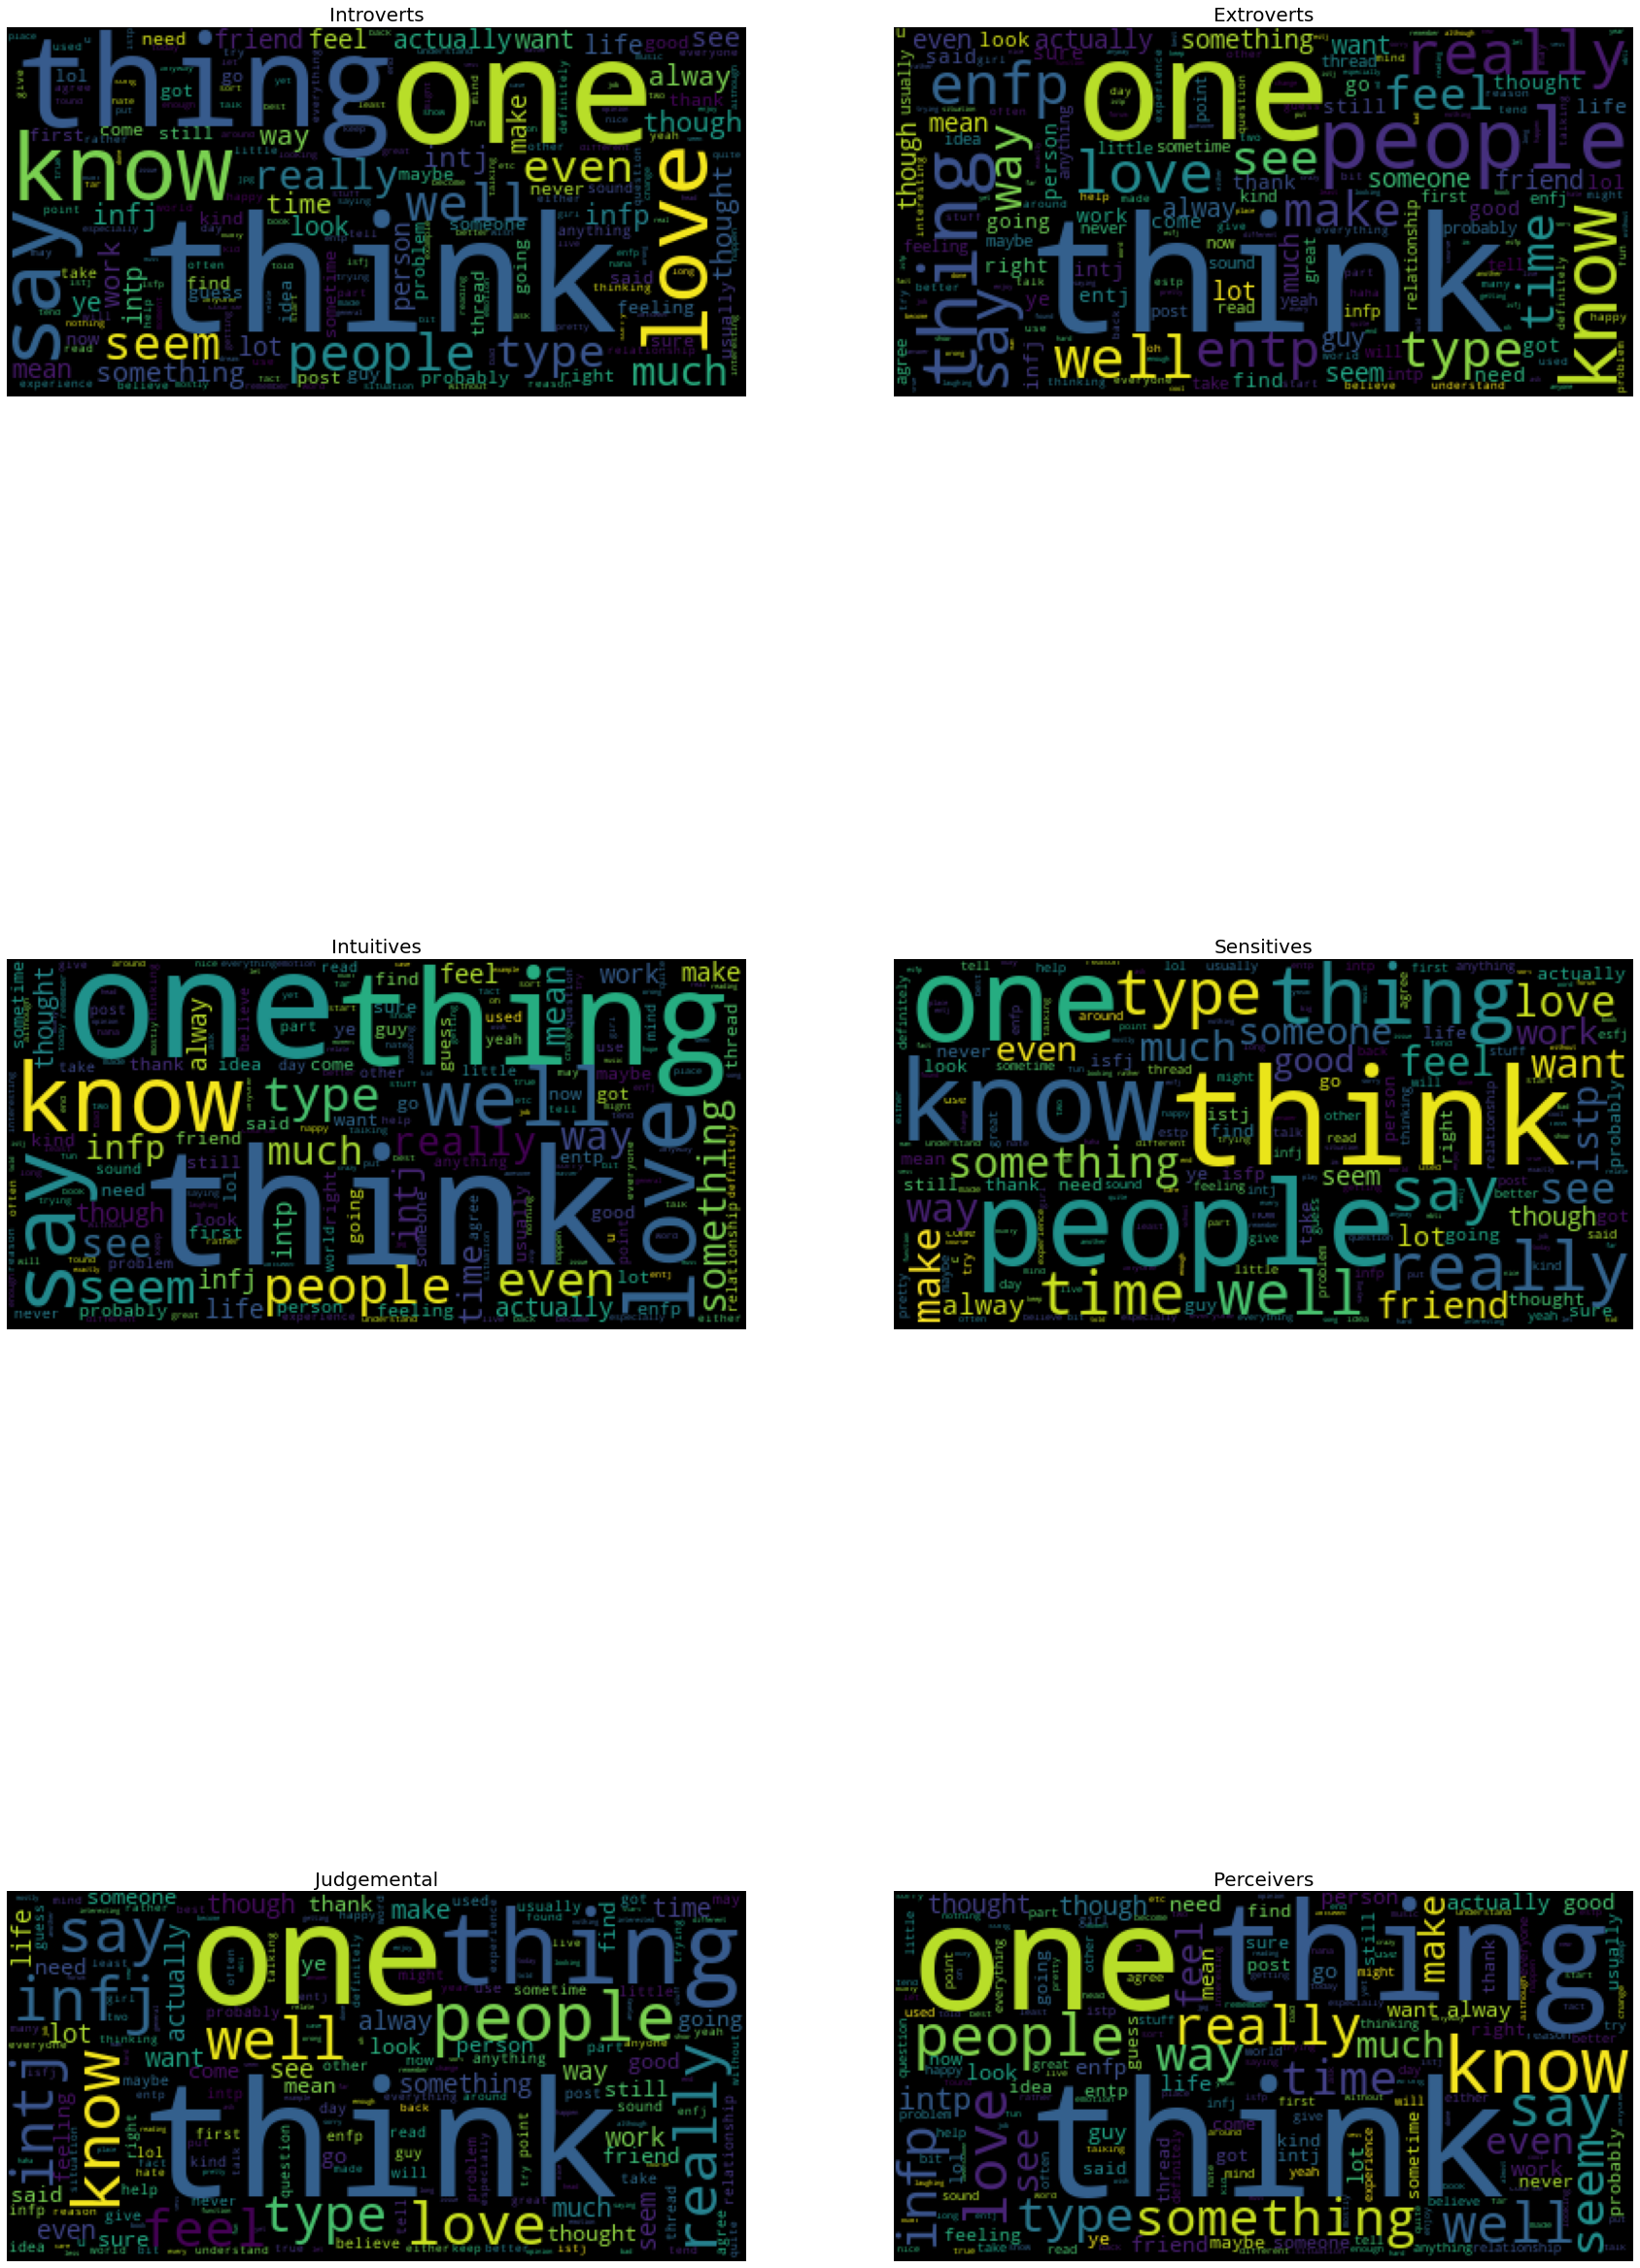

In [ ]:
fig , ax = plt.subplots(3,2,figsize=(30,50))
ax = ax.flatten()

ax[0].imshow(introverts_word_cloud)
ax[0].set_title("Introverts" , fontsize = 20)
ax[0].axis(False)

ax[1].imshow(extroverts_word_cloud)
ax[1].set_title("Extroverts" , fontsize = 20)
ax[1].axis(False)

ax[2].imshow(intuitives_word_cloud)
ax[2].set_title("Intuitives" , fontsize = 20)
ax[2].axis(False)

ax[3].imshow(sensitive_word_cloud)
ax[3].set_title("Sensitives" , fontsize = 20)
ax[3].axis(False)

ax[4].imshow(judgemental_word_cloud)
ax[4].set_title("Judgemental" , fontsize = 20)
ax[4].axis(False)

ax[5].imshow(perceivers_word_cloud)
ax[5].set_title("Perceivers" , fontsize = 20)
ax[5].axis(False)

plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
countVectorizer = CountVectorizer()
tfidfVectorizer = TfidfVectorizer()

In [ ]:
train , test = train_test_split(data , test_size=0.2 , shuffle = False)
train , val = train_test_split(train , test_size=0.1 , shuffle=False)
train.shape , val.shape , test.shape

((6245, 8), (694, 8), (1735, 8))

In [ ]:
y_train = train.loc[: , "Personality-1":"Personality-4"].values
y_val = val.loc[: , "Personality-1":"Personality-4"].values
y_test = a = test.loc[: , "Personality-1":"Personality-4"].values

In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE('minority')

# X_sm, y_sm = smote.fit_sample(train["clean-posts"], y_train)
# print(X_sm.shape, y_sm.shape)

In [ ]:
a = train["clean-posts"]

In [ ]:
a.shape

(6245,)

In [ ]:
y_train.shape

(6245, 4)

In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE('minority')

# X_sm, y_sm = smote.fit_sample(a, y_train)
# print(X_sm.shape, y_sm.shape)

In [ ]:
#For Bag of Words Vector
train_bow = countVectorizer.fit_transform(train["clean-posts"])
val_bow = countVectorizer.transform(val["clean-posts"])
test_bow = countVectorizer.transform(test["clean-posts"])

#For Tfidf Vector
train_tfidf = tfidfVectorizer.fit_transform(train["clean-posts"])
val_tfidf = tfidfVectorizer.transform(val["clean-posts"])
test_tfidf = tfidfVectorizer.transform(test["clean-posts"])

In [ ]:
train_bow.shape , val_bow.shape , test_bow.shape

((6245, 120126), (694, 120126), (1735, 120126))

In [ ]:
train_tfidf.shape , val_tfidf.shape , test_tfidf.shape

((6245, 120126), (694, 120126), (1735, 120126))

Model Training

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsOneClassifier , OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , log_loss , confusion_matrix , classification_report

In [ ]:

mulitLabelBinarizer = MultiLabelBinarizer()

y_train = mulitLabelBinarizer.fit_transform(y_train)
y_val = mulitLabelBinarizer.transform(y_val)
y_test = mulitLabelBinarizer.transform(y_test)

classes = mulitLabelBinarizer.classes_

mulitLabelBinarizer.classes_

array(['Emotional', 'Extrovert', 'Introvert', 'Intuitive', 'Judgemental',
       'Perceiving', 'Sensitive', 'Thinker'], dtype=object)

In [ ]:
y_train.shape

(6245, 8)

In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE('minority')

# X_sm, y_sm = smote.fit_sample(train_bow, y_train)
# print(X_sm.shape, y_sm.shape)

In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE('minority')

# X_sm, y_sm = smote.fit_sample(val_bow, y_val)
# print(X_sm.shape, y_sm.shape)

In [ ]:
actual = countVectorizer.transform(df_sum["clean_summ"]) # do this also

In [ ]:
next = []
prediction_summ = []
for num , personalti in enumerate(mulitLabelBinarizer.classes_):
    X = train_bow
    #X = X_sm
    y = y_train[: , num]
    #y = y_sm[: , num]
    lr = LogisticRegression(C=1)
    lr.fit(X , y)
    val_pred = lr.predict(val_bow)
    test_pred = lr.predict(test_bow)
    act_pred = lr.predict(actual)
    val_score = precision_score(y_val[:,num] , val_pred)
    test_score = precision_score(y_test[:,num] , test_pred)
    acc_val = accuracy_score(y_val[:,num] , val_pred)
    acc_test = accuracy_score(y_test[:,num] , test_pred)
    next.append(test_pred)
    prediction_summ.append(act_pred)
    print(num)
    print(f"Processing for {personalti}")
    print(f"Validation Score: {val_score}")
    print(f"Test Score: {test_score}")
    print(f"Acc Validation Score: {acc_val}")
    print(f"Acc Test Score: {acc_test}\n")

0
Processing for Emotional
Validation Score: 0.8219895287958116
Test Score: 0.8249475890985325
Acc Validation Score: 0.8112391930835735
Acc Test Score: 0.822478386167147

1
Processing for Extrovert
Validation Score: 0.5811965811965812
Test Score: 0.6191860465116279
Acc Validation Score: 0.8198847262247838
Acc Test Score: 0.8172910662824208

2
Processing for Introvert
Validation Score: 0.8682842287694974
Test Score: 0.8662832494608196
Acc Validation Score: 0.8198847262247838
Acc Test Score: 0.8172910662824208

3
Processing for Intuitive
Validation Score: 0.9082278481012658
Test Score: 0.924025974025974
Acc Validation Score: 0.8876080691642652
Acc Test Score: 0.8945244956772335

4
Processing for Judgemental
Validation Score: 0.6571428571428571
Test Score: 0.6864535768645358
Acc Validation Score: 0.729106628242075
Acc Test Score: 0.7440922190201729

5
Processing for Perceiving
Validation Score: 0.7777777777777778
Test Score: 0.7792207792207793
Acc Validation Score: 0.729106628242075
Acc T

In [ ]:
from sklearn.linear_model import SGDClassifier
next_1 = []
prediction_summ_1 = []
for num , personalti in enumerate(mulitLabelBinarizer.classes_):
    X = train_bow
    y = y_train[: , num]
    SGD = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
    SGD.fit(X , y)
    val_pred = SGD.predict(val_bow)
    test_pred = SGD.predict(test_bow)
    act_pred = SGD.predict(actual)
    val_score = precision_score(y_val[:,num] , val_pred)
    test_score = precision_score(y_test[:,num] , test_pred)
    acc_val = accuracy_score(y_val[:,num] , val_pred)
    acc_test = accuracy_score(y_test[:,num] , test_pred)
    next_1.append(test_pred)
    prediction_summ_1.append(act_pred)
    print(num)
    print(f"Processing for {personalti}")
    print(f"Validation Score: {val_score}")
    print(f"Test Score: {test_score}")
    print(f"Acc Validation Score: {acc_val}")
    print(f"Acc Test Score: {acc_test}\n")

0
Processing for Emotional
Validation Score: 0.9159663865546218
Test Score: 0.9378427787934186
Acc Validation Score: 0.7420749279538905
Acc Test Score: 0.7412103746397695

1
Processing for Extrovert
Validation Score: 0.5257142857142857
Test Score: 0.5627705627705628
Acc Validation Score: 0.8054755043227666
Acc Test Score: 0.8034582132564841

2
Processing for Introvert
Validation Score: 0.8998073217726397
Test Score: 0.8908091123330715
Acc Validation Score: 0.8054755043227666
Acc Test Score: 0.8034582132564841

3
Processing for Intuitive
Validation Score: 0.8983050847457628
Test Score: 0.9059775840597758
Acc Validation Score: 0.8890489913544669
Acc Test Score: 0.8933717579250721

4
Processing for Judgemental
Validation Score: 0.764367816091954
Test Score: 0.8080229226361032
Acc Validation Score: 0.7348703170028819
Acc Test Score: 0.7268011527377521

5
Processing for Perceiving
Validation Score: 0.725
Test Score: 0.7063492063492064
Acc Validation Score: 0.7348703170028819
Acc Test Score:

In [ ]:
from sklearn.svm import LinearSVC

next_2 = []
prediction_summ_2 = []
for num , personalti in enumerate(mulitLabelBinarizer.classes_):
    X = train_bow
    y = y_train[: , num]
    LSVC = LinearSVC()
    LSVC.fit(X , y)
    val_pred = LSVC.predict(val_bow)
    test_pred = LSVC.predict(test_bow)
    act_pred = LSVC.predict(actual)
    val_score = precision_score(y_val[:,num] , val_pred)
    test_score = precision_score(y_test[:,num] , test_pred)
    acc_val = accuracy_score(y_val[:,num] , val_pred)
    acc_test = accuracy_score(y_test[:,num] , test_pred)
    next_2.append(test_pred)
    prediction_summ_2.append(act_pred)
    print(num)
    print(f"Processing for {personalti}")
    print(f"Validation Score: {val_score}")
    print(f"Test Score: {test_score}")
    print(f"Acc Validation Score: {acc_val}")
    print(f"Acc Test Score: {acc_test}\n")

0
Processing for Emotional
Validation Score: 0.7938144329896907
Test Score: 0.8113804004214963
Acc Validation Score: 0.7853025936599424
Acc Test Score: 0.805763688760807

1
Processing for Extrovert
Validation Score: 0.5661764705882353
Test Score: 0.6016713091922006
Acc Validation Score: 0.8184438040345822
Acc Test Score: 0.8121037463976946

2
Processing for Introvert
Validation Score: 0.8799283154121864
Test Score: 0.8670058139534884
Acc Validation Score: 0.8184438040345822
Acc Test Score: 0.8121037463976946

3
Processing for Intuitive
Validation Score: 0.9154471544715447
Test Score: 0.9253139458030403
Acc Validation Score: 0.8804034582132565
Acc Test Score: 0.8835734870317002

4
Processing for Judgemental
Validation Score: 0.6263345195729537
Test Score: 0.6616989567809239
Acc Validation Score: 0.7046109510086456
Acc Test Score: 0.7279538904899135

5
Processing for Perceiving
Validation Score: 0.7578692493946732
Test Score: 0.7697368421052632
Acc Validation Score: 0.7046109510086456
Ac

In [ ]:
next

[array([1, 0, 0, ..., 0, 1, 1]),
 array([0, 1, 1, ..., 0, 0, 0]),
 array([1, 0, 0, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([1, 0, 1, ..., 1, 1, 1]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 1, ..., 1, 0, 0])]

In [ ]:
len(prediction_summ[0])

1

In [ ]:
df_pred_summ = pd.DataFrame()

In [ ]:
df_pred_summ['Emotional'] = prediction_summ[0]
df_pred_summ['Extrovert'] = prediction_summ[1]
df_pred_summ['Introvert'] = prediction_summ[2]
df_pred_summ['Intuitive'] = prediction_summ[3]
df_pred_summ['Judgemental'] = prediction_summ[4]
df_pred_summ['Perceiving'] = prediction_summ[5]
df_pred_summ['Sensitive'] = prediction_summ[6]
df_pred_summ['Thinker'] = prediction_summ[7]

In [ ]:
df_pred_summ['Emotional'] = df_pred_summ['Emotional'].map({1: 'Emotional',0:0})
df_pred_summ['Extrovert'] = df_pred_summ['Extrovert'].map({1: 'Extrovert',0:0})
df_pred_summ['Introvert'] = df_pred_summ['Introvert'].map({1: 'Introvert',0:0})
df_pred_summ['Intuitive'] = df_pred_summ['Intuitive'].map({1: 'Intuitive',0:0})
df_pred_summ['Judgemental'] = df_pred_summ['Judgemental'].map({1: 'Judgemental',0:0})
df_pred_summ['Perceiving'] = df_pred_summ['Perceiving'].map({1: 'Perceiving',0:0})
df_pred_summ['Sensitive'] = df_pred_summ['Sensitive'].map({1: 'Sensitive',0:0})
df_pred_summ['Thinker'] = df_pred_summ['Thinker'].map({1: 'Thinker',0:0})

In [ ]:
df_pred_summ = df_pred_summ[["Introvert","Extrovert","Intuitive","Sensitive","Emotional","Thinker","Judgemental","Perceiving"]]
df_pred_summ

,Introvert,Extrovert,Intuitive,Sensitive,Emotional,Thinker,Judgemental,Perceiving
0,Introvert,0,Intuitive,0,Emotional,0,Judgemental,0


In [ ]:
personality_map = {
    "Introvert":"I",
    "Extrovert":"E",
    "Intuitive":"N",
    "Sensitive":"S",
    "Emotional":"F",
    "Thinker":"T",
    "Judgemental":"J",
    "Perceiving":"P"
}

for col in df_pred_summ.loc[: , "Introvert":"Perceiving"].columns:
    df_pred_summ[col] = df_pred_summ[col].map(personality_map)

In [ ]:
df_pred_summ.head()

,Introvert,Extrovert,Intuitive,Sensitive,Emotional,Thinker,Judgemental,Perceiving
0,I,NaN,N,NaN,F,NaN,J,NaN


In [ ]:
df_pred_summ['Type'] = df_pred_summ[df_pred_summ.columns[0:]].apply(lambda x: ''.join(x.dropna().astype(str)),axis=1)

In [ ]:
df_pred_summ.head()
df_temp = df_pred_summ['Type']

In [ ]:
df_temp.head()

0    INFJ
Name: Type, dtype: object

In [ ]:
df_final = pd.DataFrame(df_sum['clean_summ'],columns=['clean_summ'])

In [ ]:
df_final.reset_index(drop=True,inplace=True)

In [ ]:
df_final.head()

,clean_summ
0,to' 'managing director managing director manag...


In [ ]:
df_predicted_summary = pd.concat([df_final,df_temp],axis=1)

In [ ]:
df_predicted_summary

,clean_summ,Type
0,to' 'managing director managing director manag...,INFJ


In [ ]:
df_predicted_summary.to_csv('/content/drive/My Drive/LinkedIn/predicted_summary.csv',index=None)

In [ ]:
df_predicted_summary

,clean_summ,Type
0,to' 'managing director managing director manag...,INFJ
